# Assignment (III)



---


#Question 1. (3 points)
* **For this question, please follow the steps outlined below:**
## Part (a):

* **Data Loading:** Read the lymph dataset from your mounted Google Drive using Pandas.

* **Data Splitting:** Split the dataset randomly into a 60% training set and a 40% test set using scikit-learn's train_test_split function.

* **Handling Categorical Data:** Encode categorical attributes with one-hot encoding using pandas.get_dummies, dropping the first attribute to avoid redundancy.

* **Decision Tree Classifier (1st Experiment):** Train a Decision Tree classifier in scikit-learn on the training data, setting the splitting criterion to "entropy," and requiring a minimum of 4 samples to split an internal node. Keep other settings unchanged.

* **Reproducibility:** Set the random_state to 32 in train_test_split and DecisionTreeClassifier to make your codes reproducible.

* **Performance Evaluation (1st Experiment):** Report the Decision Tree classifier's accuracy on the test data. Also, generate a high-resolution tree visualization (use plt.figure(figsize=(12, 8), dpi=300)).





Mounted at /content/drive
    lymphatics block_of_affere bl_of_lymph_c bl_of_lymph_s by_pass  \
0       arched             yes            no            no      no   
1    displaced             yes            no            no     yes   
2     deformed              no            no            no     yes   
3       arched              no            no            no      no   
4       arched              no            no            no      no   
..         ...             ...           ...           ...     ...   
143  displaced              no            no            no      no   
144   deformed              no            no            no      no   
145   deformed             yes            no            no     yes   
146   deformed             yes            no            no      no   
147     arched              no            no            no      no   

    extravasates regeneration_of early_uptake_in  lym_nodes_dimin  \
0             no              no             yes                

[Text(0.5375, 0.9166666666666666, 'changes_in_node_lac_margin <= 0.5\nentropy = 1.209\nsamples = 88\nvalue = [2, 40, 45, 1]'),
 Text(0.325, 0.75, 'no_of_nodes_in <= 2.5\nentropy = 1.195\nsamples = 49\nvalue = [2, 33, 13, 1]'),
 Text(0.2, 0.5833333333333334, 'exclusion_of_no_yes <= 0.5\nentropy = 1.196\nsamples = 26\nvalue = [0, 12, 13, 1]'),
 Text(0.1, 0.4166666666666667, 'changes_in_lym_oval <= 0.5\nentropy = 1.096\nsamples = 11\nvalue = [0, 2, 8, 1]'),
 Text(0.05, 0.25, 'entropy = 0.811\nsamples = 4\nvalue = [0, 0, 3, 1]'),
 Text(0.15, 0.25, 'entropy = 0.863\nsamples = 7\nvalue = [0, 2, 5, 0]'),
 Text(0.3, 0.4166666666666667, 'no_of_nodes_in <= 1.5\nentropy = 0.918\nsamples = 15\nvalue = [0, 10, 5, 0]'),
 Text(0.25, 0.25, 'entropy = 0.985\nsamples = 7\nvalue = [0, 3, 4, 0]'),
 Text(0.35, 0.25, 'changes_in_stru_faint <= 0.5\nentropy = 0.544\nsamples = 8\nvalue = [0, 7, 1, 0]'),
 Text(0.3, 0.08333333333333333, 'entropy = 0.811\nsamples = 4\nvalue = [0, 3, 1, 0]'),
 Text(0.4, 0.08333333

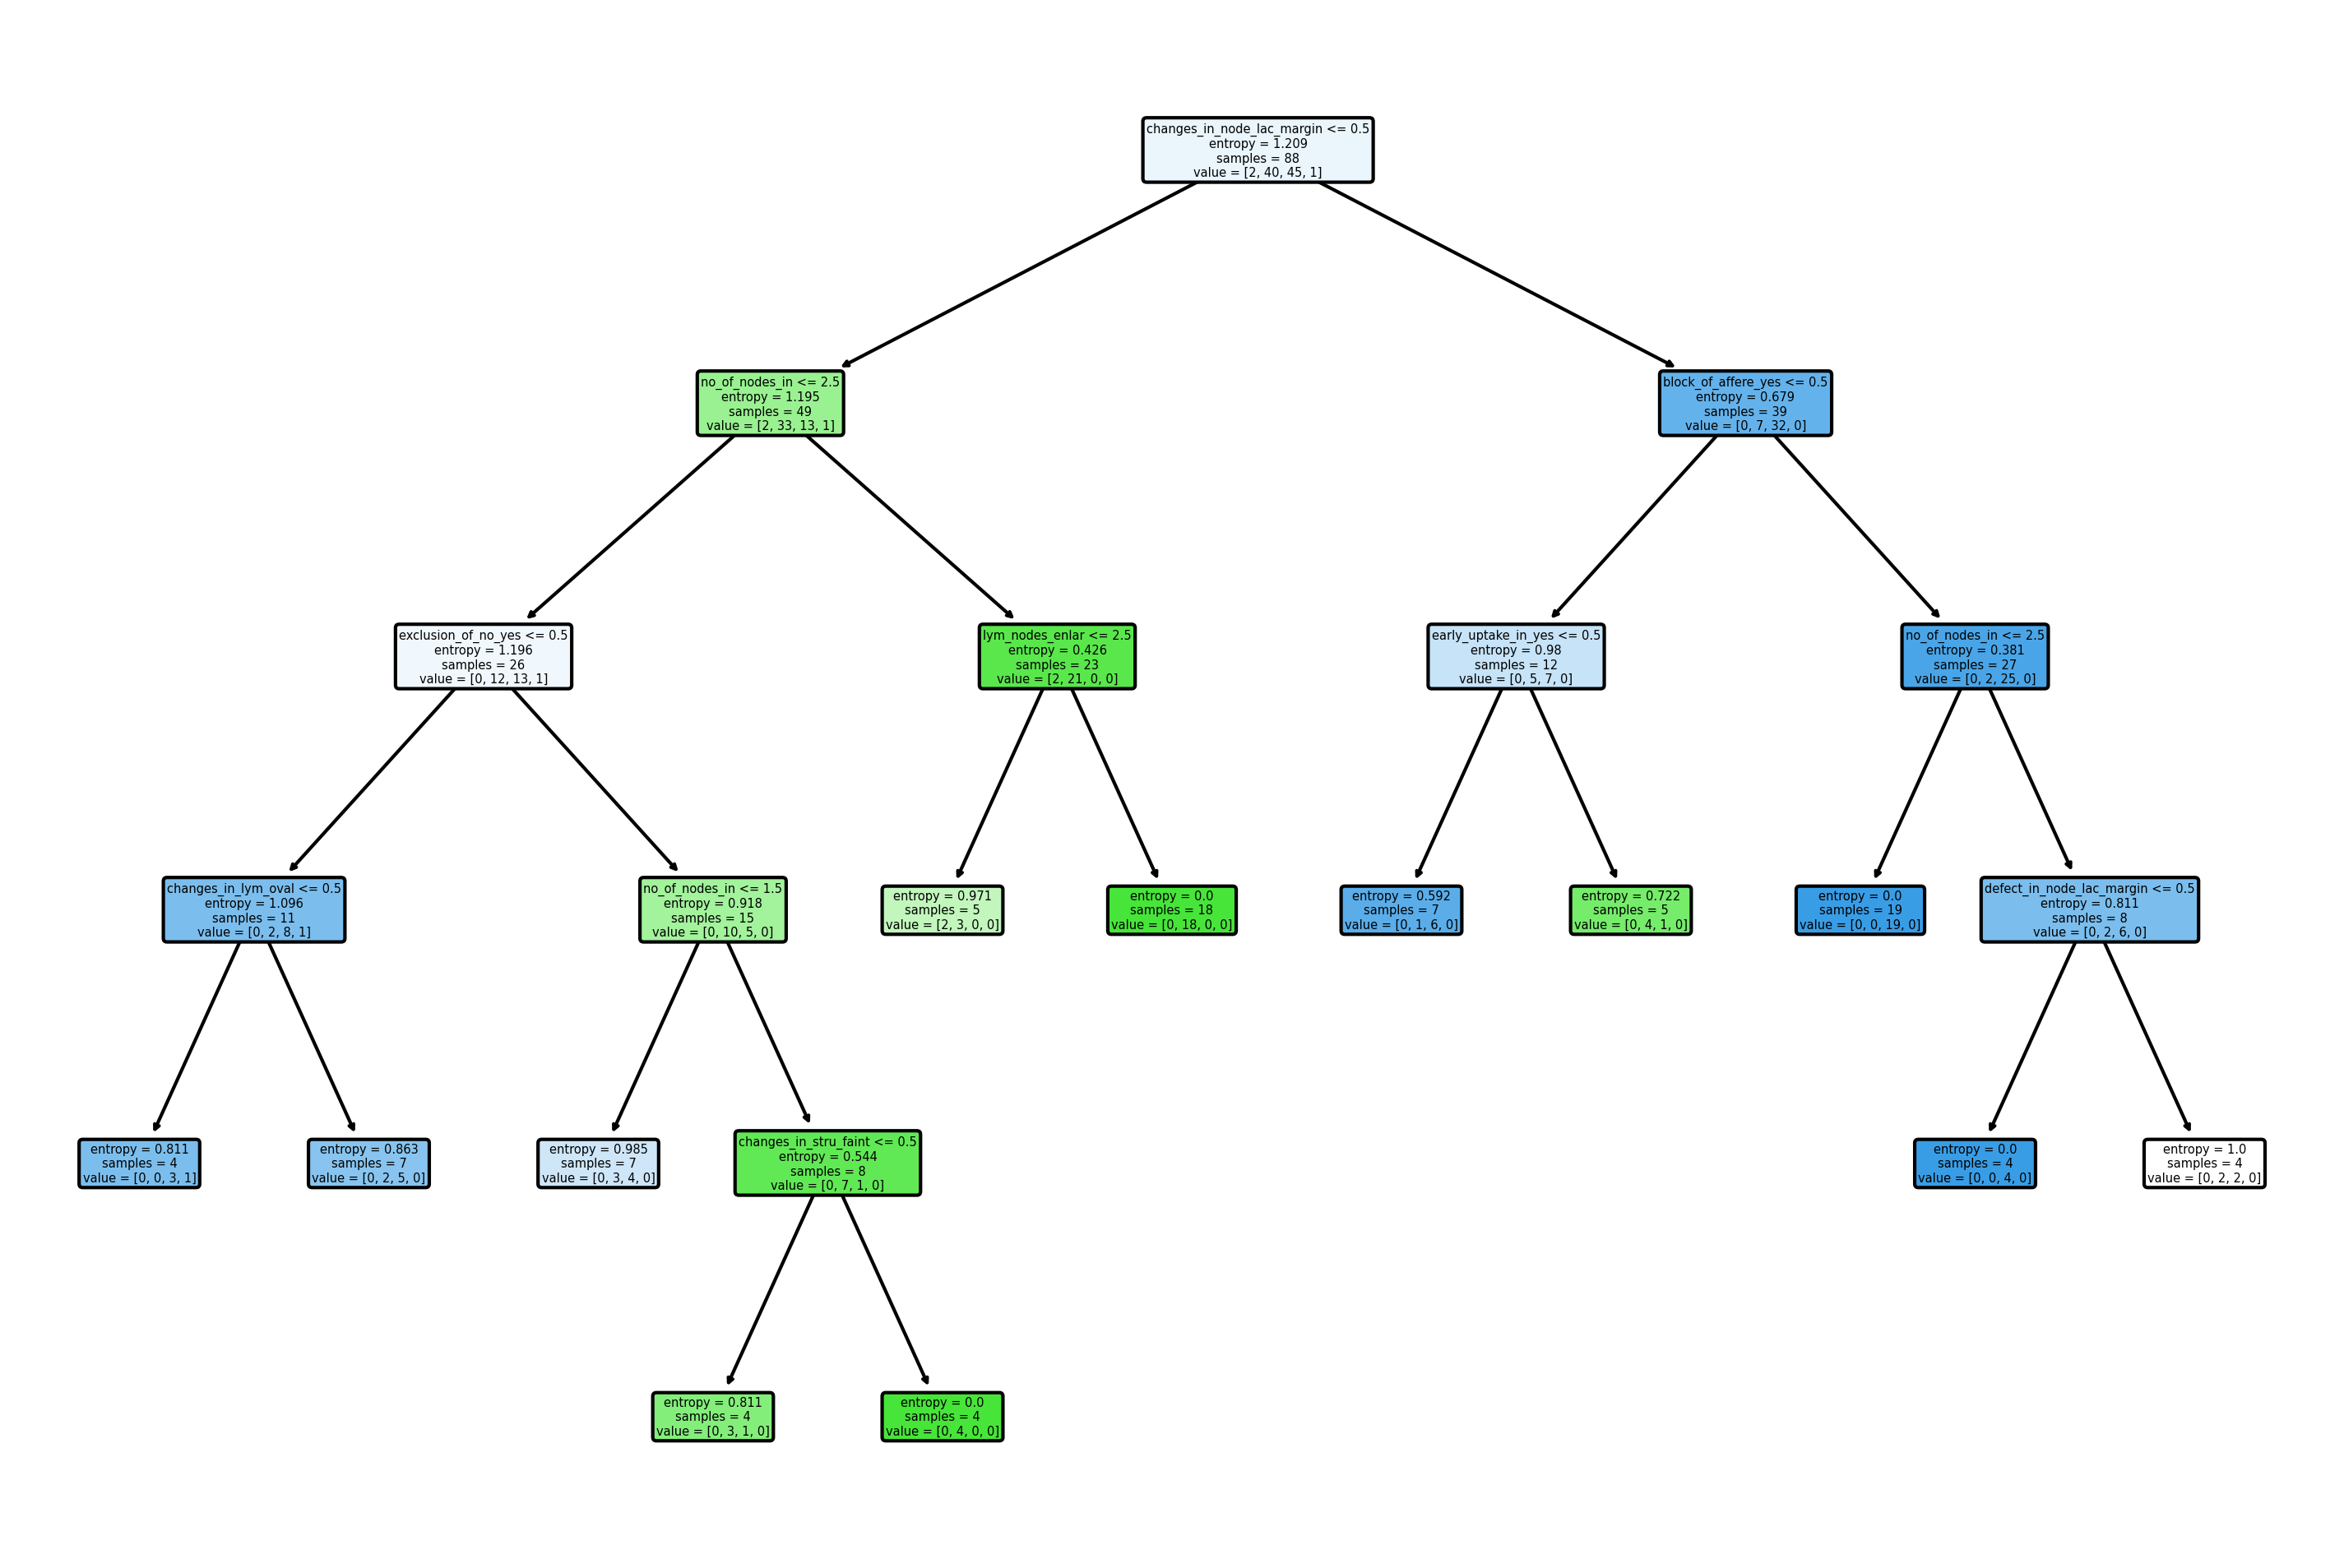

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/datamining/data-mining-assignment3/lymph.csv")  # Load your dataset

#.............................................................................
# write the rest here

# remove single quotes from column names
df.columns = df.columns.str.replace("'", "")

# encode the categorical variables as numbers using one-hot encoding
print(df)
encoded_df = pd.get_dummies(data=df, columns=['lymphatics', 'block_of_affere', 'bl_of_lymph_c', 'bl_of_lymph_s', 'by_pass', 'extravasates', 'regeneration_of', 'early_uptake_in', 'changes_in_lym', 'defect_in_node', 'changes_in_node', 'changes_in_stru', 'special_forms', 'dislocation_of', 'exclusion_of_no'], drop_first=True)

# split the dataset into 60% training and 40% testing
train, test = train_test_split(encoded_df, train_size=0.6, test_size=0.4, random_state=32)

# train a decision tree classifier with a split criterion of "entropy" and requiring a minimum of 4 samples at a leaf node
clf = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=4)
clf.fit(train.drop('class', axis=1), train['class'])

# test the classifier on the testing set
y_pred = clf.predict(test.drop('class', axis=1))

# print accuracy
print("Accuracy:", accuracy_score(test['class'], y_pred))

# plot the the decision tree
plt.figure(figsize=(12, 8), dpi=300)
plot_tree(clf, filled=True, rounded=True, feature_names=encoded_df.drop('class', axis=1).columns)




#.............................................................................


## Part (b):


Modify the minimum samples required for splitting to 32 and re-run the experiment. Report the accuracy of the Decision Tree classifier with the modified parameter and create a visualization of the tree. Discuss the differences between the two Decision Trees and their respective results, highlighting how changing the minimum samples for splitting affects the tree structure and performance.


Accuracy: 0.7833333333333333


[Text(0.5, 0.75, 'changes_in_node_lac_margin <= 0.5\nentropy = 1.209\nsamples = 88\nvalue = [2, 40, 45, 1]'),
 Text(0.25, 0.25, 'entropy = 1.195\nsamples = 49\nvalue = [2, 33, 13, 1]'),
 Text(0.75, 0.25, 'entropy = 0.679\nsamples = 39\nvalue = [0, 7, 32, 0]')]

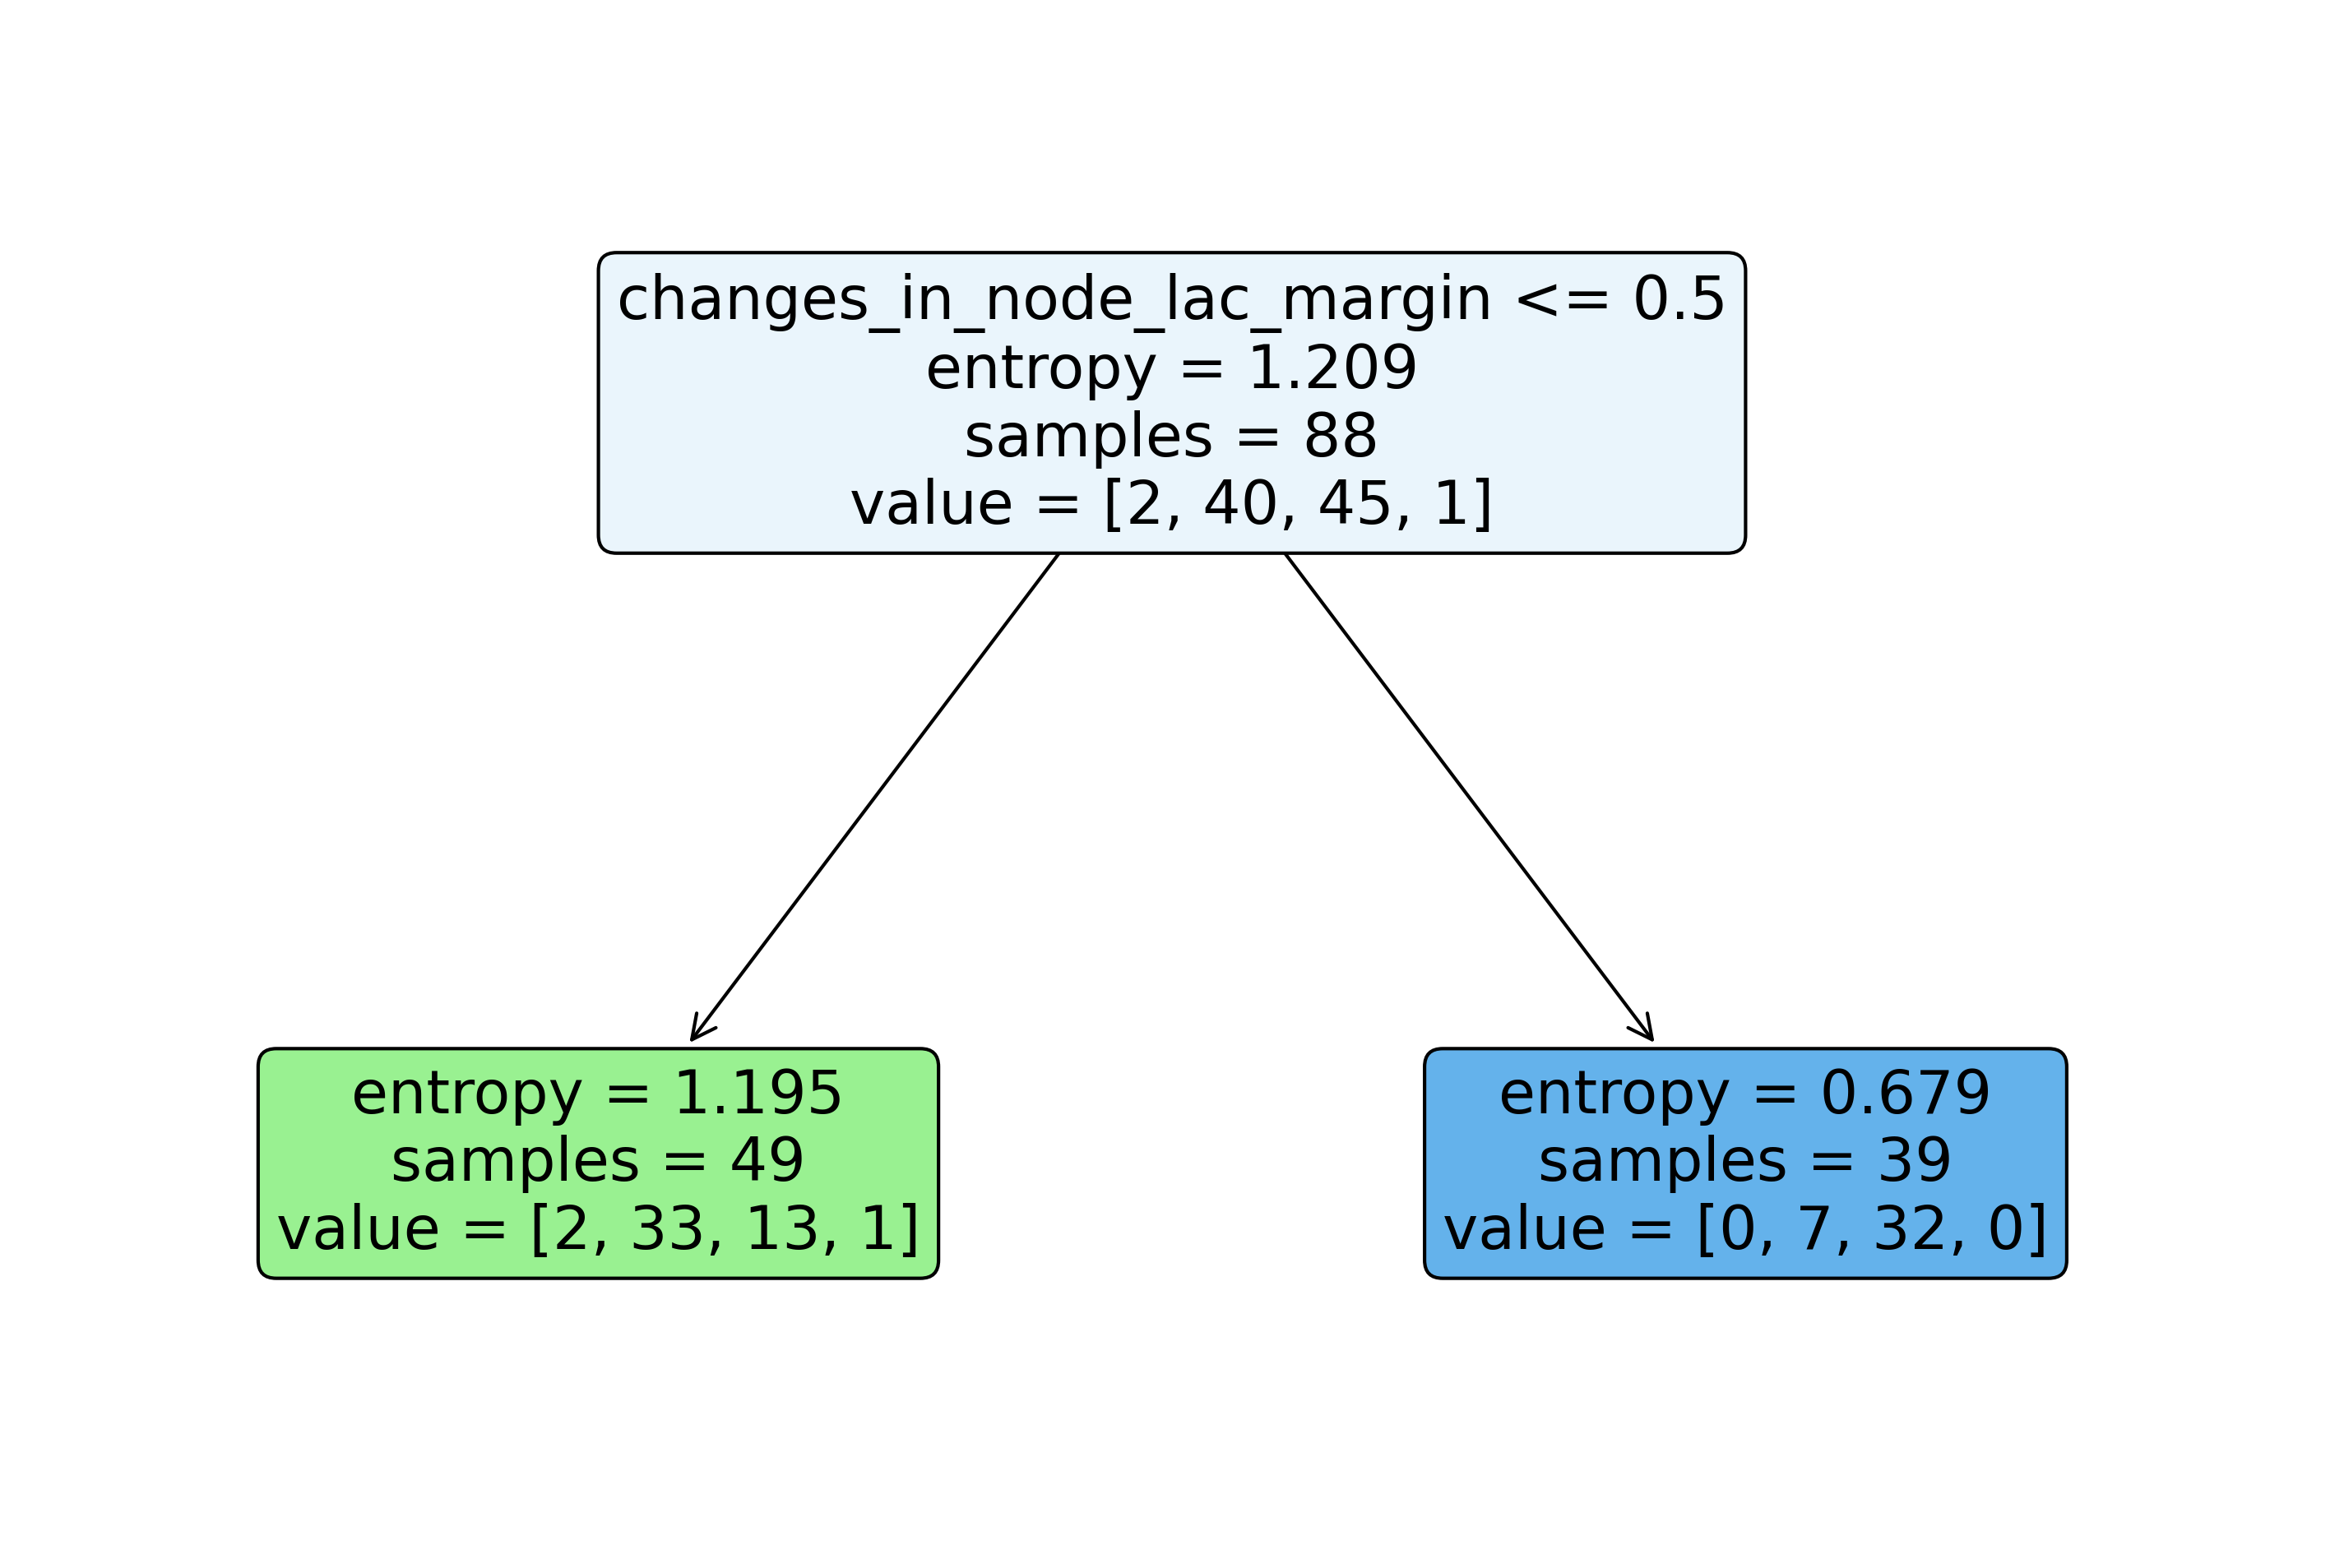

In [ ]:

#.............................................................................
# write the rest here

# train a decision tree classifier with a split criterion of "entropy" and requiring a minimum of 4 samples at a leaf node
clf = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=32)
clf.fit(train.drop('class', axis=1), train['class'])

# test the classifier on the testing set
y_pred = clf.predict(test.drop('class', axis=1))

# print accuracy
print("Accuracy:", accuracy_score(test['class'], y_pred))

# plot the the decision tree
plt.figure(figsize=(12, 8), dpi=300)
plot_tree(clf, filled=True, rounded=True, feature_names=encoded_df.drop('class', axis=1).columns)








#.............................................................................

When altering the minimum number of samples required to split from 4 to 32, the accuracy went from 81.7% to 78%. The change in accuracy was not overly significant, however the change in the structure of the decsion trees is major. It goes from many splits to a single split which is a huge reduction in complexity.






---


# Question 2. (5 points)
##Part (a):
*  Write a Python function named "preprocess" that preprocesses and prepares
datasets for machine learning. It must take a training dataset and an optional test dataset as input. The code must first identify categorical and numerical attributes, then handle missing values by imputing the mean for numerical attributes and the most frequent value for categorical attributes. It is worth noting that to determine if an attribute is numerical, the process should involve checking its data type and potentially examining the number of unique values. This is necessary because an attribute may appear to have an "object" data type but could, in fact, be numerical in nature.

*  Subsequently, the "preprocess" code must standardize the numerical attributes by removing the mean and scaling to unit variance., and encodes categorical attributes using one-hot encoding.

*  If a test dataset is provided, it must undergo the same preprocessing steps, ensuring that the imputation for missing values and data scaling are performed based on the values obtained from the training dataset, thus maintaining consistency between the two datasets.

*  At the end, the function must return the preprocessed training and test datasets as (X_train, y_train, X_test, y_test) tuple if the test dataset exists. Otherwise it must return (X_train, y_train). X stands for independent processed attributes, while y indicates the class attribute.

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
def preprocess(train_df, test_df=None):
  #.............................................................................
  # write your codes here
  # identify the categorical and numerical attributes
  train_df.replace('?', np.nan, inplace=True)
  if test_df is not None:
      test_df.replace('?', np.nan, inplace=True)

  num_attrs = []
  cat_attrs = []
  for col in train_df.columns:
    if col == 'class':
      continue
    if train_df[col].dtype in ['int64', 'float64']:
      num_attrs.append(col)
    else:
      try:
        train_df[col] = train_df[col].astype(float)
        num_attrs.append(col)
      except:
        if len(train_df[col].unique()) > 20:
          num_attrs.append(col)
        else:
          cat_attrs.append(col)

  # print num_attrs and cat_attrs and the first 5 rows of the training dataset
  print(f"Numerical attributes: {num_attrs}")
  print(f"First 5 rows of training dataset of numerical attributes:\n{train_df[num_attrs].head()}")
  print(f"Categorical attributes: {cat_attrs}")
  print(f"First 5 rows of training dataset of categorical attributes:\n{train_df[cat_attrs].head()}")


  # for any missing value, replace with means for num, modes for cat
  num_imputer = SimpleImputer(strategy='mean')
  cat_imputer = SimpleImputer(strategy='most_frequent')
  if num_attrs:
    train_df[num_attrs] = num_imputer.fit_transform(train_df[num_attrs])
  if cat_attrs:
    train_df[cat_attrs] = cat_imputer.fit_transform(train_df[cat_attrs])
  if test_df is not None:
      if num_attrs:
        test_df[num_attrs] = num_imputer.transform(test_df[num_attrs])
      if cat_attrs:
        test_df[cat_attrs] = cat_imputer.transform(test_df[cat_attrs])


  # use standard scaler to standardize numerical attributes
  scaler = StandardScaler()
  train_df[num_attrs] = scaler.fit_transform(train_df[num_attrs])

  if test_df is not None:
    test_df[num_attrs] = scaler.transform(test_df[num_attrs])

  # use encoder to one-hot encode categorical attributes
  if cat_attrs:
    encoder = OneHotEncoder(drop='first')
    train_encoded = encoder.fit_transform(train_df[cat_attrs])
    train_encoded_df = pd.DataFrame(train_encoded.toarray(), columns=encoder.get_feature_names_out(cat_attrs), index=train_df.index)
    train_df = train_df.drop(columns=cat_attrs)
    train_df = pd.concat([train_df, train_encoded_df], axis=1)

    if test_df is not None:
      test_encoded = encoder.transform(test_df[cat_attrs])
      test_encoded_df = pd.DataFrame(test_encoded.toarray(), columns=encoder.get_feature_names_out(cat_attrs), index=test_df.index)
      test_df = test_df.drop(columns=cat_attrs)
      test_df = pd.concat([test_df, test_encoded_df], axis=1)

  print(train_df.columns)

  X_train = train_df.drop('class', axis=1)
  y_train = train_df['class']

  #.............................................................................
  if test_df is not None:
      print(test_df.columns)
      X_test = test_df.drop('class', axis=1)
      y_test = test_df['class']
      return X_train, y_train, X_test, y_test
  else:
      # If no test dataset is provided, return only the preprocessed training dataset
      return X_train, y_train


## Part (b)
In this task, your objective is to assess the performance of various machine learning classifiers for a credit classification problem. To ensure result reproducibility, set the random_state to 42 in KFold, Decision Tree, MLP Neural Network, and Random Forest. For the MLP, configure two hidden layers with 100 and 50 hidden units, respectively, and set max_iter to 1000. For the Random Forest, set the number of trees in the forest to 100. Finally, report the accuracy achieved on the test dataset.

In [ ]:
# import necessary libraries
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Load the training and test datasets
credit_train = pd.read_csv("/content/drive/MyDrive/datamining/data-mining-assignment3/credit-a-train.csv")
credit_test = pd.read_csv("/content/drive/MyDrive/datamining/data-mining-assignment3/credit-a-test.csv")

# Preprocess the datasets and split them into features (X) and target (y)
X_train, y_train, X_test, y_test = preprocess(credit_train, credit_test)
#.............................................................................
# write your codes here

# with all random_state values set to 42

# decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))

# KNeighborsClassifier classifier with k=1
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred))

# KNeighborsClassifier classifier with k=3
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred))

# Gaussian Naive Bayes classifier
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Gaussian Naive Bayes Accuracy:", accuracy_score(y_test, y_pred))

# Logistic Regression classifier
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))


# MLP classifier
clf = MLPClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("MLP Accuracy:", accuracy_score(y_test, y_pred))

# Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))


  #.............................................................................

Numerical attributes: ['A2', 'A3', 'A8', 'A11', 'A14', 'A15']
First 5 rows of training dataset of numerical attributes:
      A2     A3     A8  A11    A14    A15
0  58.67  4.460  3.040    6   43.0    560
1  33.17  1.040  6.500    0  164.0  31285
2  29.92  1.835  4.335    0  260.0    200
3  28.25  0.875  0.960    3  396.0      0
4  23.25  1.000  0.835    0  300.0      0
Categorical attributes: ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']
First 5 rows of training dataset of categorical attributes:
  A1 A4 A5 A6 A7 A9 A10 A12 A13
0  a  u  g  q  h  t   t   f   g
1  b  u  g  r  h  t   f   t   g
2  b  u  g  c  h  t   f   f   g
3  b  u  g  m  v  t   t   t   g
4  b  u  g  c  v  t   f   f   s
Index(['A2', 'A3', 'A8', 'A11', 'A14', 'A15', 'class', 'A1_b', 'A4_u', 'A4_y',
       'A5_gg', 'A5_p', 'A6_c', 'A6_cc', 'A6_d', 'A6_e', 'A6_ff', 'A6_i',
       'A6_j', 'A6_k', 'A6_m', 'A6_q', 'A6_r', 'A6_w', 'A6_x', 'A7_dd',
       'A7_ff', 'A7_h', 'A7_j', 'A7_n', 'A7_o', 'A7_v', 'A7_z', 'A9_t

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Accuracy: 0.8985507246376812
Random Forest Accuracy: 0.8985507246376812


As you can see from the output, when the random_state is set to 42 in KFold, Decision Tree, MLP Neural Network, and Random Forest, and when the MLP the two hidden layers are configured 100 and 50 hidden units, respectively, and max_iter is set to 1000, and in the Random Forest, number of trees in the forest is set to 100, the accuracies we recieve for each algorithm given the testing and training data are as follows:

* Decision Tree Accuracy: 0.8043478260869565
* KNN Accuracy: 0.7681159420289855
* KNN Accuracy: 0.8188405797101449
* Gaussian Naive Bayes Accuracy: 0.8405797101449275
* Logistic Regression Accuracy: 0.855072463768116
* Random Forest Accuracy: 0.8985507246376812





---


# Question 3. (4 points)
## Part (a)
 Use the ionosphere dataset and Run a 10-fold cross validation to evaluate classification error rate of each algorithm. Use the preprocessing function you have written in question 2. Similar to the previous question, set the random_state to 42 in KFold, Decision Tree, MLP Neural Network, and Random Forest. For the MLP, configure two hidden layers with 100 and 50 hidden units, respectively, and set max_iter to 1000. For the Random Forest, set the number of trees in the forest to 100.

In [ ]:
# Import necessary libraries
from sklearn.model_selection import cross_val_score, KFold

# Load the Ionosphere dataset and preprocess it
ionosphere_dataset = pd.read_csv("/content/drive/MyDrive/datamining/data-mining-assignment3/ionosphere.csv")
X, y = preprocess(ionosphere_dataset)
#.............................................................................
# write your codes here

'''
Use the ionosphere dataset and Run a 10-fold cross validation to evaluate classification error rate of each algorithm. Use the preprocessing function you have written in question 2. Similar to the previous question, set the random_state to 42 in KFold, Decision Tree, MLP Neural Network, and Random Forest. For the MLP, configure two hidden layers with 100 and 50 hidden units, respectively, and set max_iter to 1000. For the Random Forest, set the number of trees in the forest to 100.
'''

# decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(clf, X, y, cv=cv)
print(f"Decision Tree Accuracy: {scores.mean()} and classification error rate: {1-scores.mean()}")

# KNeighborsClassifier classifier with k=1
clf = KNeighborsClassifier(n_neighbors=1)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(clf, X, y, cv=cv)
print(f"KNN Accuracy: {scores.mean()} and classification error rate: {1-scores.mean()}")

# KNeighborsClassifier classifier with k=3
clf = KNeighborsClassifier(n_neighbors=3)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(clf, X, y, cv=cv)
print(f"KNN Accuracy: {scores.mean()} and classification error rate: {1-scores.mean()}")

# Gaussian Naive Bayes classifier
clf = GaussianNB()
cv = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(clf, X, y, cv=cv)
print(f"Gaussian Naive Bayes Accuracy: {scores.mean()} and classification error rate: {1-scores.mean()}")

# Logistic Regression classifier
clf = LogisticRegression(random_state=42)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(clf, X, y, cv=cv)
print(f"Logistic Regression Accuracy: {scores.mean()} and classification error rate: {1-scores.mean()}")


# MLP classifier
clf = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(clf, X, y, cv=cv)
print(f"MLP Accuracy: {scores.mean()} and classification error rate: {1-scores.mean()}")

# Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(clf, X, y, cv=cv)
print(f"Random Forest Accuracy: {scores.mean()} and classification error rate: {1-scores.mean()}")


#.............................................................................

Numerical attributes: ['a01', 'a02', 'a03', 'a04', 'a05', 'a06', 'a07', 'a08', 'a09', 'a10', 'a11', 'a12', 'a13', 'a14', 'a15', 'a16', 'a17', 'a18', 'a19', 'a20', 'a21', 'a22', 'a23', 'a24', 'a25', 'a26', 'a27', 'a28', 'a29', 'a30', 'a31', 'a32', 'a33', 'a34']
First 5 rows of training dataset of numerical attributes:
   a01  a02      a03      a04      a05      a06      a07      a08      a09  \
0    1    0  0.99539 -0.05889  0.85243  0.02306  0.83398 -0.37708  1.00000   
1    1    0  1.00000 -0.18829  0.93035 -0.36156 -0.10868 -0.93597  1.00000   
2    1    0  1.00000 -0.03365  1.00000  0.00485  1.00000 -0.12062  0.88965   
3    1    0  1.00000 -0.45161  1.00000  1.00000  0.71216 -1.00000  0.00000   
4    1    0  1.00000 -0.02401  0.94140  0.06531  0.92106 -0.23255  0.77152   

       a10  ...      a25      a26      a27      a28      a29      a30  \
0  0.03760  ...  0.56811 -0.51171  0.41078 -0.46168  0.21266 -0.34090   
1 -0.04549  ... -0.20332 -0.26569 -0.20468 -0.18401 -0.19040 -0.11

## Part (b)
 Write a piece of code to perform feature selection using mutual information scores (mutual_info_classif in sklearn) on the processed ionosphere dataset (X) with its corresponding class labels (y). Your code must calculate these scores and then must select the top 5 attributes with the highest scores. Report what are these 5 selected attributes.

In [ ]:
# Import the necessary library for feature selection
from sklearn.feature_selection import mutual_info_classif

# Calculate mutual information scores for each feature
mi_scores = mutual_info_classif(X, y)

# Get the top 5 features with the highest scores
selected_attrs = X.columns[np.argsort(mi_scores)[-5:]].values

# Print the top 5 features
print("Top 5 features with the highest mutual information scores:")
print(selected_attrs)


Top 5 features with the highest mutual information scores:
['a27' 'a08' 'a05' 'a06' 'a21']


##Part (c)
Using only the top five attributes selected by the previous feature selection method, repeat k-fold validation to report the classification errors for each classifier. Then, discuss whether the results for each classifier have improved and explore the potential reasons behind any changes.

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
# Create a new dataset (X_low_dim) with only the selected attributes
X_low_dim = X[selected_attrs]

# decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(clf, X_low_dim, y, cv=cv)
print(f"Decision Tree Accuracy: {scores.mean()} and classification error rate: {1-scores.mean()}")

# KNeighborsClassifier classifier with k=1
clf = KNeighborsClassifier(n_neighbors=1)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(clf, X_low_dim, y, cv=cv)
print(f"KNN Accuracy: {scores.mean()} and classification error rate: {1-scores.mean()}")

# KNeighborsClassifier classifier with k=3
clf = KNeighborsClassifier(n_neighbors=3)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(clf, X_low_dim, y, cv=cv)
print(f"KNN Accuracy: {scores.mean()} and classification error rate: {1-scores.mean()}")

# Gaussian Naive Bayes classifier
clf = GaussianNB()
cv = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(clf, X_low_dim, y, cv=cv)
print(f"Gaussian Naive Bayes Accuracy: {scores.mean()} and classification error rate: {1-scores.mean()}")

# Logistic Regression classifier
clf = LogisticRegression(random_state=42)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(clf, X_low_dim, y, cv=cv)
print(f"Logistic Regression Accuracy: {scores.mean()} and classification error rate: {1-scores.mean()}")


# MLP classifier
clf = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(clf, X_low_dim, y, cv=cv)
print(f"MLP Accuracy: {scores.mean()} and classification error rate: {1-scores.mean()}")

# Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(clf, X_low_dim, y, cv=cv)
print(f"Random Forest Accuracy: {scores.mean()} and classification error rate: {1-scores.mean()}")



#.............................................................................

Decision Tree Accuracy: 0.8973809523809525 and classification error rate: 0.1026190476190475
KNN Accuracy: 0.9061111111111112 and classification error rate: 0.0938888888888888
KNN Accuracy: 0.9201587301587301 and classification error rate: 0.07984126984126994
Gaussian Naive Bayes Accuracy: 0.8915873015873016 and classification error rate: 0.1084126984126984
Logistic Regression Accuracy: 0.8319841269841269 and classification error rate: 0.16801587301587306
MLP Accuracy: 0.9202380952380953 and classification error rate: 0.0797619047619047
Random Forest Accuracy: 0.9202380952380953 and classification error rate: 0.0797619047619047


Comparing part A and part C we can see from the results that there has been a substantial improvement in the accuracy reported from each algorithm. There are a few reasons why this could be the case. By using the top 5 most relevant attributes we're able to generate stronger relations and in turn generate stronger classification rules that would naturally lead to higher accuracies. Specifying specific most relevan attributes would also highly reduce the chance of overfitting and in turn also lead to a higher overall accuracy. Finally you have better generalization of data as a result of higher relevane of data present in each column.




---


 # Question 4. (4 points)
 Report the classification error rate on each data set and the average classification error rate of each method over all the data sets. Rank the methods according to their average classification error rate. For the top two methods (with the lowest average error rates), are their average error rates significantly different? Why? Comparing the method with the lowest average error rate and the one with the highest error rate, are their error rates significantly different? Why? Briefly discuss the results.

 (or result reproducibility, set the random_state to 42 in KFold, Decision Tree, MLP Neural Network, and Random Forest. Configure the MLP with two hidden layers having 100 and 50 hidden units, and set max_iter to 1000.)


In [ ]:
#.............................................................................
# write your codes here
# Import necessary libraries
from sklearn.model_selection import cross_val_score, KFold

# Load the Ionosphere dataset and preprocess it
ionosphere_dataset = pd.read_csv("/content/drive/MyDrive/data-mining-assignment3/datasets/ionosphere.csv")
X, y = preprocess(ionosphere_dataset)
#.............................................................................
# write your codes here

'''
Use the ionosphere dataset and Run a 10-fold cross validation to evaluate classification error rate of each algorithm. Use the preprocessing function you have written in question 2. Similar to the previous question, set the random_state to 42 in KFold, Decision Tree, MLP Neural Network, and Random Forest. For the MLP, configure two hidden layers with 100 and 50 hidden units, respectively, and set max_iter to 1000. For the Random Forest, set the number of trees in the forest to 100.
'''

# decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
ion_dtc_scores = cross_val_score(clf, X, y, cv=cv)
print(f"Decision classification error rate: {1-ion_dtc_scores.mean()}")

# KNeighborsClassifier classifier with k=1
clf = KNeighborsClassifier(n_neighbors=1)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
ion_knn1_scores = cross_val_score(clf, X, y, cv=cv)
print(f"KNN classification error rate: {1-ion_knn1_scores.mean()}")

# KNeighborsClassifier classifier with k=3
clf = KNeighborsClassifier(n_neighbors=3)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
ion_knn3_scores = cross_val_score(clf, X, y, cv=cv)
print(f"KNN classification error rate: {1-ion_knn3_scores.mean()}")

# Gaussian Naive Bayes classifier
clf = GaussianNB()
cv = KFold(n_splits=10, shuffle=True, random_state=42)
ion_gnn_scores = cross_val_score(clf, X, y, cv=cv)
print(f"Gaussian classification error rate: {1-ion_gnn_scores.mean()}")

# Logistic Regression classifier
clf = LogisticRegression(random_state=42)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
ion_lr_scores = cross_val_score(clf, X, y, cv=cv)
print(f"Logistic classification error rate: {1-ion_lr_scores.mean()}")

# MLP classifier
clf = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
ion_mlp_scores = cross_val_score(clf, X, y, cv=cv)
print(f"MLP classification error rate: {1-ion_mlp_scores.mean()}")

# Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
ion_rf_scores = cross_val_score(clf, X, y, cv=cv)
print(f"Random classification error rate: {1-ion_rf_scores.mean()}")


#.............................................................................

In [ ]:
#.............................................................................
# write your codes here
# Import necessary libraries
from sklearn.model_selection import cross_val_score, KFold

# Load the Ionosphere dataset and preprocess it
balanceScale_dataset = pd.read_csv("/content/drive/MyDrive/data-mining-assignment3/datasets/balance-scale.csv")
X, y = preprocess(balanceScale_dataset)
#.............................................................................
# write your codes here

'''
Use the Balance Scale dataset and Run a 10-fold cross validation to evaluate classification error rate of each algorithm. Use the preprocessing function you have written in question 2. Similar to the previous question, set the random_state to 42 in KFold, Decision Tree, MLP Neural Network, and Random Forest. For the MLP, configure two hidden layers with 100 and 50 hidden units, respectively, and set max_iter to 1000. For the Random Forest, set the number of trees in the forest to 100.
'''

# decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
balance_dtc_scores = cross_val_score(clf, X, y, cv=cv)
print(f"Decision Tree Classification error rate: {1-balance_dtc_scores.mean()}")

# KNeighborsClassifier classifier with k=1
clf = KNeighborsClassifier(n_neighbors=1)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
balance_knn1_scores = cross_val_score(clf, X, y, cv=cv)
print(f"KNN classification error rate: {1-balance_knn1_scores.mean()}")

# KNeighborsClassifier classifier with k=3
clf = KNeighborsClassifier(n_neighbors=3)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
balance_knn3_scores = cross_val_score(clf, X, y, cv=cv)
print(f"KNN classification error rate: {1-balance_knn3_scores.mean()}")

# Gaussian Naive Bayes classifier
clf = GaussianNB()
cv = KFold(n_splits=10, shuffle=True, random_state=42)
balance_gnn_scores = cross_val_score(clf, X, y, cv=cv)
print(f"Gaussian Naive Bayes classification error rate: {1-balance_gnn_scores.mean()}")

# Logistic Regression classifier
clf = LogisticRegression(random_state=42)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
balance_lr_scores = cross_val_score(clf, X, y, cv=cv)
print(f"Logistic classification error rate: {1-balance_lr_scores.mean()}")

# MLP classifier
clf = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
balance_mlp_scores = cross_val_score(clf, X, y, cv=cv)
print(f"MLP classification error rate: {1-balance_mlp_scores.mean()}")

# Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
balance_rf_scores = cross_val_score(clf, X, y, cv=cv)
print(f"Random classification error rate: {1-balance_rf_scores.mean()}")


#.............................................................................

In [ ]:
#.............................................................................
# write your codes here
# Import necessary libraries
from sklearn.model_selection import cross_val_score, KFold

# Load the Ionosphere dataset and preprocess it
iris_dataset = pd.read_csv("/content/drive/MyDrive/data-mining-assignment3/datasets/iris.csv")
X, y = preprocess(iris_dataset)
#.............................................................................
# write your codes here

'''
Use the iris dataset and Run a 10-fold cross validation to evaluate classification error rate of each algorithm. Use the preprocessing function you have written in question 2. Similar to the previous question, set the random_state to 42 in KFold, Decision Tree, MLP Neural Network, and Random Forest. For the MLP, configure two hidden layers with 100 and 50 hidden units, respectively, and set max_iter to 1000. For the Random Forest, set the number of trees in the forest to 100.
'''

# decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
iris_dtc_scores = cross_val_score(clf, X, y, cv=cv)
print(f"Decision classification error rate: {1-iris_dtc_scores.mean()}")

# KNeighborsClassifier classifier with k=1
clf = KNeighborsClassifier(n_neighbors=1)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
iris_knn1_scores = cross_val_score(clf, X, y, cv=cv)
print(f"KNN classification error rate: {1-iris_knn1_scores.mean()}")

# KNeighborsClassifier classifier with k=3
clf = KNeighborsClassifier(n_neighbors=3)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
iris_knn3_scores = cross_val_score(clf, X, y, cv=cv)
print(f"KNN classification error rate: {1-iris_knn3_scores.mean()}")

# Gaussian Naive Bayes classifier
clf = GaussianNB()
cv = KFold(n_splits=10, shuffle=True, random_state=42)
iris_gnn_scores = cross_val_score(clf, X, y, cv=cv)
print(f"Gaussian classification error rate: {1-iris_gnn_scores.mean()}")

# Logistic Regression classifier
clf = LogisticRegression(random_state=42)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
iris_lr_scores = cross_val_score(clf, X, y, cv=cv)
print(f"Logistic classification error rate: {1-iris_lr_scores.mean()}")

# MLP classifier
clf = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
iris_mlp_scores = cross_val_score(clf, X, y, cv=cv)
print(f"MLP classification error rate: {1-iris_mlp_scores.mean()}")

# Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
iris_rf_scores = cross_val_score(clf, X, y, cv=cv)
print(f"Random Forest classification error rate: {1-iris_rf_scores.mean()}")


#.............................................................................

In [ ]:
#.............................................................................
# write your codes here
# Import necessary libraries
from sklearn.model_selection import cross_val_score, KFold

# Load the Ionosphere dataset and preprocess it
wine_dataset = pd.read_csv("/content/drive/MyDrive/data-mining-assignment3/datasets/wine.csv")
X, y = preprocess(wine_dataset)
#.............................................................................
# write your codes here

'''
Use the wine dataset and Run a 10-fold cross validation to evaluate classification error rate of each algorithm. Use the preprocessing function you have written in question 2. Similar to the previous question, set the random_state to 42 in KFold, Decision Tree, MLP Neural Network, and Random Forest. For the MLP, configure two hidden layers with 100 and 50 hidden units, respectively, and set max_iter to 1000. For the Random Forest, set the number of trees in the forest to 100.
'''

# decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
wine_dtc_scores = cross_val_score(clf, X, y, cv=cv)
print(f"Decision Tree classification error rate: {1-wine_dtc_scores.mean()}")

# KNeighborsClassifier classifier with k=1
clf = KNeighborsClassifier(n_neighbors=1)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
wine_knn1_scores = cross_val_score(clf, X, y, cv=cv)
print(f"KNN classification error rate: {1-wine_knn1_scores.mean()}")

# KNeighborsClassifier classifier with k=3
clf = KNeighborsClassifier(n_neighbors=3)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
wine_knn3_scores = cross_val_score(clf, X, y, cv=cv)
print(f"KNN classification error rate: {1-wine_knn3_scores.mean()}")

# Gaussian Naive Bayes classifier
clf = GaussianNB()
cv = KFold(n_splits=10, shuffle=True, random_state=42)
wine_gnn_scores = cross_val_score(clf, X, y, cv=cv)
print(f"Gaussian Naive Bayes classification error rate: {1-wine_gnn_scores.mean()}")

# Logistic Regression classifier
clf = LogisticRegression(random_state=42)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
wine_lr_scores = cross_val_score(clf, X, y, cv=cv)
print(f"Logistic Regression classification error rate: {1-wine_lr_scores.mean()}")

# MLP classifier
clf = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
wine_mlp_scores = cross_val_score(clf, X, y, cv=cv)
print(f"MLP classification error rate: {1-wine_mlp_scores.mean()}")

# Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
wine_rf_scores = cross_val_score(clf, X, y, cv=cv)
print(f"Random Forest classification error rate: {1-wine_rf_scores.mean()}")


#.............................................................................

In [ ]:
#.............................................................................
# write your codes here
# Import necessary libraries
from sklearn.model_selection import cross_val_score, KFold

# Load the Ionosphere dataset and preprocess it
glass_dataset = pd.read_csv("/content/drive/MyDrive/data-mining-assignment3/datasets/glass.csv")
X, y = preprocess(glass_dataset)
#.............................................................................
# write your codes here

'''
Use the glass dataset and Run a 10-fold cross validation to evaluate classification error rate of each algorithm. Use the preprocessing function you have written in question 2. Similar to the previous question, set the random_state to 42 in KFold, Decision Tree, MLP Neural Network, and Random Forest. For the MLP, configure two hidden layers with 100 and 50 hidden units, respectively, and set max_iter to 1000. For the Random Forest, set the number of trees in the forest to 100.
'''

# decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
glass_dtc_scores = cross_val_score(clf, X, y, cv=cv)
print(f"Decision Tree classification error rate: {1-glass_dtc_scores.mean()}")

# KNeighborsClassifier classifier with k=1
clf = KNeighborsClassifier(n_neighbors=1)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
glass_knn1_scores = cross_val_score(clf, X, y, cv=cv)
print(f"KNN classification error rate: {1-glass_knn1_scores.mean()}")


# KNeighborsClassifier classifier with k=3
clf = KNeighborsClassifier(n_neighbors=3)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
glass_knn3_scores = cross_val_score(clf, X, y, cv=cv)
print(f"KNN classification error rate: {1-glass_knn3_scores.mean()}")

# Gaussian Naive Bayes classifier
clf = GaussianNB()
cv = KFold(n_splits=10, shuffle=True, random_state=42)
glass_gnn_scores = cross_val_score(clf, X, y, cv=cv)
print(f"Gaussian Naive Bayes classification error rate: {1-glass_gnn_scores.mean()}")

# Logistic Regression classifier
clf = LogisticRegression(random_state=42)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
glass_lr_scores = cross_val_score(clf, X, y, cv=cv)
print(f"Logistic classification error rate: {1-glass_lr_scores.mean()}")

# MLP classifier
clf = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
glass_mlp_scores = cross_val_score(clf, X, y, cv=cv)
print(f"MLP classification error rate: {1-glass_mlp_scores.mean()}")

# Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
glass_rf_scores = cross_val_score(clf, X, y, cv=cv)
print(f"Random Forest classification error rate: {1-glass_rf_scores.mean()}")



#.............................................................................

In [ ]:
#.............................................................................
# write your codes here
# Import necessary libraries
from sklearn.model_selection import cross_val_score, KFold

# Load the Ionosphere dataset and preprocess it
ecoli_dataset = pd.read_csv("/content/drive/MyDrive/data-mining-assignment3/datasets/ecoli.csv")
X, y = preprocess(ecoli_dataset)
#.............................................................................
# write your codes here

'''
Use the ecoli dataset and Run a 10-fold cross validation to evaluate classification error rate of each algorithm. Use the preprocessing function you have written in question 2. Similar to the previous question, set the random_state to 42 in KFold, Decision Tree, MLP Neural Network, and Random Forest. For the MLP, configure two hidden layers with 100 and 50 hidden units, respectively, and set max_iter to 1000. For the Random Forest, set the number of trees in the forest to 100.
'''

# decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
ecoli_dtc_scores = cross_val_score(clf, X, y, cv=cv)
print(f"Decision Tree classification error rate: {1-ecoli_dtc_scores.mean()}")

# KNeighborsClassifier classifier with k=1
clf = KNeighborsClassifier(n_neighbors=1)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
ecoli_knn1_scores = cross_val_score(clf, X, y, cv=cv)
print(f"KNN classification error rate: {1-ecoli_knn1_scores.mean()}")

# KNeighborsClassifier classifier with k=3
clf = KNeighborsClassifier(n_neighbors=3)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
ecoli_knn3_scores = cross_val_score(clf, X, y, cv=cv)
print(f"KNN lassification error rate: {1-ecoli_knn3_scores.mean()}")

# Gaussian Naive Bayes classifier
clf = GaussianNB()
cv = KFold(n_splits=10, shuffle=True, random_state=42)
ecoli_gnn_scores = cross_val_score(clf, X, y, cv=cv)
print(f"Gaussian Naive Bayes classification error rate: {1-ecoli_gnn_scores.mean()}")

# Logistic Regression classifier
clf = LogisticRegression(random_state=42)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
ecoli_lr_scores = cross_val_score(clf, X, y, cv=cv)
print(f"Logistic Regression classification error rate: {1-ecoli_lr_scores.mean()}")

# MLP classifier
clf = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
ecoli_mlp_scores = cross_val_score(clf, X, y, cv=cv)
print(f"MLP classification error rate: {1-ecoli_mlp_scores.mean()}")

# Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
ecoli_rf_scores = cross_val_score(clf, X, y, cv=cv)
print(f"Random Forest classification error rate: {1-ecoli_rf_scores.mean()}")


#.............................................................................

In [ ]:
#.............................................................................
# write your codes here
# Import necessary libraries
from sklearn.model_selection import cross_val_score, KFold

# Load the Ionosphere dataset and preprocess it
yeast_dataset = pd.read_csv("/content/drive/MyDrive/data-mining-assignment3/datasets/yeast.csv")
X, y = preprocess(yeast_dataset)
#.............................................................................
# write your codes here

'''
Use the yeast dataset and Run a 10-fold cross validation to evaluate classification error rate of each algorithm. Use the preprocessing function you have written in question 2. Similar to the previous question, set the random_state to 42 in KFold, Decision Tree, MLP Neural Network, and Random Forest. For the MLP, configure two hidden layers with 100 and 50 hidden units, respectively, and set max_iter to 1000. For the Random Forest, set the number of trees in the forest to 100.
'''

# decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
yeast_dtc_scores = cross_val_score(clf, X, y, cv=cv)
print(f"Decision Tree classification error rate: {1-yeast_dtc_scores.mean()}")

# KNeighborsClassifier classifier with k=1
clf = KNeighborsClassifier(n_neighbors=1)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
yeast_knn1_scores = cross_val_score(clf, X, y, cv=cv)
print(f"KNN 1 classification error rate: {1-yeast_knn1_scores.mean()}")

# KNeighborsClassifier classifier with k=3
clf = KNeighborsClassifier(n_neighbors=3)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
yeast_knn3_scores = cross_val_score(clf, X, y, cv=cv)
print(f"KNN 3 classification error rate: {1-yeast_knn3_scores.mean()}")

# Gaussian Naive Bayes classifier
clf = GaussianNB()
cv = KFold(n_splits=10, shuffle=True, random_state=42)
yeast_nb_scores = cross_val_score(clf, X, y, cv=cv)
print(f"Gaussian Naive Bayes classification error rate: {1-yeast_nb_scores.mean()}")

# Logistic Regression classifier
clf = LogisticRegression(random_state=42)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
yeast_lr_scores = cross_val_score(clf, X, y, cv=cv)
print(f"Logistic Regression classification error rate: {1-yeast_lr_scores.mean()}")

# MLP classifier
clf = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
yeast_mlp_scores = cross_val_score(clf, X, y, cv=cv)
print(f"MLP classification error rate: {1-yeast_mlp_scores.mean()}")

# Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
yeast_rf_scores = cross_val_score(clf, X, y, cv=cv)
print(f"Random Forest classification error rate: {1-yeast_rf_scores.mean()}")


#.............................................................................

In [ ]:
#Calculate the averages error rates across all methods
average_DTC = (1-yeast_dtc_scores.mean()) + (1-ecoli_dtc_scores.mean()) + (1-glass_dtc_scores.mean()) + (1-wine_dtc_scores.mean()) + (1-iris_dtc_scores.mean()) + (1-balance_dtc_scores.mean()) + (1-ion_dtc_scores.mean())/ 7
average_KNN1 = (1-yeast_knn1_scores.mean()) + (1-ecoli_knn1_scores.mean()) + (1-glass_knn1_scores.mean()) + (1-wine_knn1_scores.mean()) + (1-iris_knn1_scores.mean()) + (1-balance_knn1_scores.mean()) + (1-ion_knn3_scores.mean())/ 7
average_KNN3 = (1-yeast_knn3_scores.mean()) + (1-ecoli_knn3_scores.mean()) + (1-glass_knn3_scores.mean()) + (1-wine_knn3_scores.mean()) + (1-iris_knn3_scores.mean()) + (1-balance_knn3_scores.mean()) + (1-ion_knn3_scores.mean())/ 7
average_GNN = (1-yeast_nb_scores.mean()) + (1-ecoli_gnn_scores.mean()) + (1-glass_gnn_scores.mean()) + (1-wine_gnn_scores.mean()) + (1-iris_gnn_scores.mean()) + (1-balance_gnn_scores.mean()) + (1-ion_gnn_scores.mean())/ 7
average_LR = (1-yeast_lr_scores.mean()) + (1-ecoli_lr_scores.mean()) + (1-glass_lr_scores.mean()) + (1-wine_lr_scores.mean()) + (1-iris_lr_scores.mean()) + (1-balance_lr_scores.mean()) + (1-ion_lr_scores.mean())/ 7
average_MLPNN = (1-yeast_mlp_scores.mean()) + (1-ecoli_mlp_scores.mean()) + (1-glass_mlp_scores.mean()) + (1-wine_mlp_scores.mean()) + (1-iris_mlp_scores.mean()) + (1-balance_mlp_scores.mean()) + (1-ion_mlp_scores.mean())/ 7
average_RF = (1-yeast_rf_scores.mean()) + (1-ecoli_rf_scores.mean()) + (1-glass_rf_scores.mean()) + (1-wine_rf_scores.mean()) + (1-iris_rf_scores.mean()) + (1-balance_rf_scores.mean()) + (1-ion_rf_scores.mean())/ 7
print(average_DTC, average_KNN1, average_KNN3, average_GNN, average_LR, average_MLPNN, average_RF)

The 2 lowest average error rates are the Random Forest algorithm and the MLP Neural Network, who return values that aren't too different from each other. This is due to the versatility and complexity of both models, with MLP's capacity for intricate relationships and Random Forest's ensemble nature, contribute to a balanced performance when the problem doesn't require the full expressive power of MLP. There are also many factors that could be at play such as noise, column values and labels that favor the conditions of these 2 algorithms and their strenghts. As for the lowest and highest values we have the Decision Tree Classifier as the highest and the MLP Neural Network at the lowest. This could be for similar reasons to why the first 2 values were so low, meaning things like noise and complimentary data. However their are other factors that can be at play, such as potential overfitting, feature scaling for larger datasets, the actual dataset values themselves, etc.



---


#Question 5. (14 points)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE, ADASYN
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score


# Load the dataset
df = pd.read_csv('risk-train.txt', delimiter='\t')


# replace missing values with NaN
df.replace('?', np.nan, inplace=True)

# Drop columns with more than 25% valid data
half_count = len(df) / 10
df = df.dropna(thresh=half_count, axis=1)

# identify the categorical and numerical attributes
num_attrs = []
cat_attrs = []
for col in df.columns:
    if col == 'CLASS':
        continue
    if df[col].dtype in ['int64', 'float64']:
        num_attrs.append(col)
    else:
        try:
            df[col] = df[col].astype(float)
            num_attrs.append(col)
        except:
            cat_attrs.append(col)

# fill missing values with mean for numerical attributes and mode for categorical attributes
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

print(len(num_attrs))
print(num_imputer.fit_transform(df[num_attrs]).shape[1])

# for any missing value, replace with means for num, modes for cat
imputed_num_attrs = pd.DataFrame(num_imputer.fit_transform(df[num_attrs]), columns=num_attrs)
df[num_attrs] = imputed_num_attrs

imputed_cat_attrs = pd.DataFrame(cat_imputer.fit_transform(df[cat_attrs]), columns=cat_attrs)
df[cat_attrs] = imputed_cat_attrs

# split the dataset into features (X) and target (y)
X = df.drop('CLASS', axis=1)
y = df['CLASS']

# encode the categorical variables as numbers using one-hot encoding
encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
encoded_df = pd.DataFrame(encoder.fit_transform(X[cat_attrs]).toarray(), columns=encoder.get_feature_names(cat_attrs))
X = pd.concat([X[num_attrs], encoded_df], axis=1)

# split the dataset into 60% training and 40% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# set the class weights to be 5 for "no" and 50 for "yes"
class_weights = {"no": 5, "yes": 50}

# use SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)


# print the number of samples in each class
print(y_train.value_counts())


# create a random forest classifier
clf = RandomForestClassifier(random_state=42, class_weight=class_weights)
clf.fit(X_train, y_train)

# test the classifier on the testing set
y_pred = clf.predict(X_test)

# print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))



In [ ]:

new_df = pd.read_csv('risk-test.txt', delimiter='\t')
new_df.replace('?', np.nan, inplace=True)

# keep only the columns in new_df that are also in df
new_df = new_df[df.columns.intersection(new_df.columns)]

new_num_attrs = []
new_cat_attrs = []
for col in new_df.columns:
    if col == 'CLASS':
        continue
    if new_df[col].dtype in ['int64', 'float64']:
        new_num_attrs.append(col)
    else:
        try:
            new_df[col] = new_df[col].astype(float)
            new_num_attrs.append(col)
        except:
            new_cat_attrs.append(col)

new_imputed_num_attrs = pd.DataFrame(num_imputer.transform(new_df[new_num_attrs]), columns=new_num_attrs)
new_df[new_num_attrs] = new_imputed_num_attrs

new_imputed_cat_attrs = pd.DataFrame(cat_imputer.transform(new_df[new_cat_attrs]), columns=new_cat_attrs)
new_df[new_cat_attrs] = new_imputed_cat_attrs

new_encoded_df = pd.DataFrame(encoder.transform(new_df[new_cat_attrs]).toarray(), columns=encoder.get_feature_names(new_cat_attrs))
new_df = pd.concat([new_df[new_num_attrs], new_encoded_df], axis=1)

new_y_pred = clf.predict(new_df)

# write the results to a file
with open('prediction.txt', 'w') as f:
    f.write('ORDER-ID CLASS\n')
    for i, pred in enumerate(new_y_pred):
        f.write(str(new_df.index[i]) + ' ' + pred + '\n')



**For question 5, your detailed report should be presented in a separate PDF file.**